In [ ]:
# requirements: pandas, numpy, matplotlib, seaborn, nltk, vaderSentiment, wordcloud, adjustText

#%%
import os
import numpy as np
import pandas as pd
from adjustText import adjust_text
import seaborn as sns
import matplotlib.pyplot as plt
import nltk, string
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud
from textwrap import shorten
from matplotlib.lines import Line2D

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
sns.set_theme(
    style="whitegrid",    # clean grid background
    context="talk",       # larger fonts (great for presentation)
    palette="Blues_r"     # consistent color scheme
)

# setting default figure size & font scaling
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.titlepad'] = 15

In [ ]:
df = pd.read_csv('data/1429_1.csv')
df = df[['reviews.rating', 'reviews.text', 'reviews.title', 'categories', 'brand']]
df.head()

<ipython-input-3-9bac69547d7c>:3: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/1429_1.csv')


,reviews.rating,reviews.text,reviews.title,categories,brand
0,5.0,This product so far has not disappointed. My c...,Kindle,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon
1,5.0,great for beginner or experienced person. Boug...,very fast,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon


In [ ]:
stop = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = ''.join([c for c in text if c not in string.punctuation])
    words = [w for w in text.split() if w not in stop]
    return " ".join(words)

df['cleaned_reviews'] = df['reviews.text'].fillna('').apply(clean_text)
df.head()

,reviews.rating,reviews.text,reviews.title,categories,brand,cleaned_reviews
0,5.0,This product so far has not disappointed. My c...,Kindle,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,product far disappointed children love use lik...
1,5.0,great for beginner or experienced person. Boug...,very fast,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,great beginner experienced person bought gift ...
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,inexpensive tablet use learn step nabi thrille...
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,ive fire hd 8 two weeks love tablet great valu...
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,bought grand daughter comes visit set user ent...


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
df['sentiment_scores'] = df['cleaned_reviews'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

def label_sentiment(score):
    if score >= 0.05: return 'positive'
    elif score <= -0.05: return 'negative'
    else: return 'neutral'

df['sentiment_label'] = df['sentiment_scores'].apply(label_sentiment)
df['sentiment_label'].value_counts(normalize=True)

sentiment_label
positive    0.906492
negative    0.048788
neutral     0.044720
Name: proportion, dtype: float64

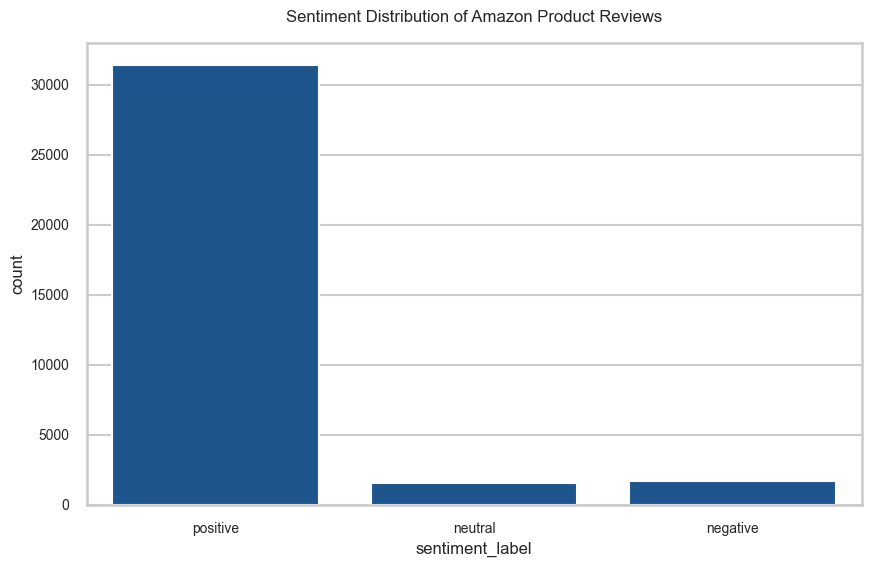

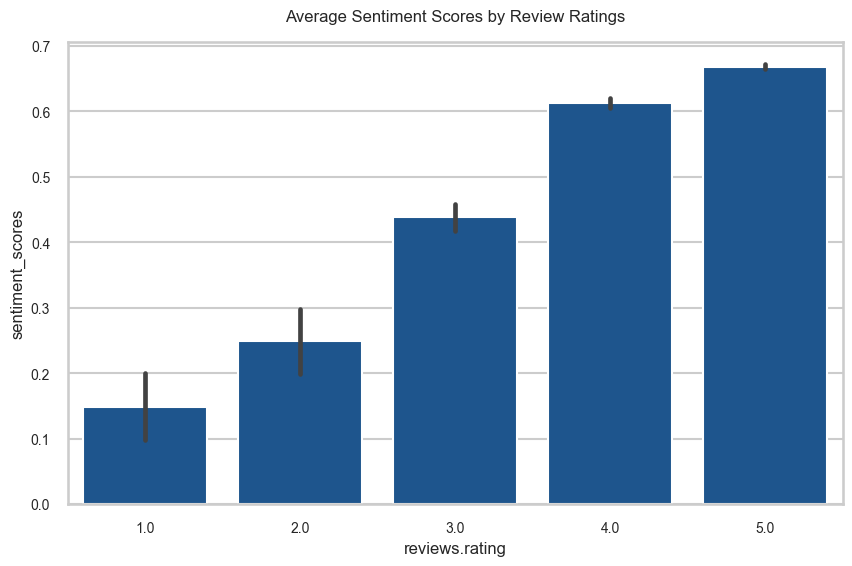

,reviews.rating,reviews.text,reviews.title,categories,brand,cleaned_reviews,sentiment_scores,sentiment_label
0,5.0,This product so far has not disappointed. My c...,Kindle,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,product far disappointed children love use lik...,0.8126,positive
1,5.0,great for beginner or experienced person. Boug...,very fast,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,great beginner experienced person bought gift ...,0.8934,positive
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,inexpensive tablet use learn step nabi thrille...,0.4404,positive
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,ive fire hd 8 two weeks love tablet great valu...,0.9880,positive
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,bought grand daughter comes visit set user ent...,0.9313,positive


In [ ]:
sns.countplot(data=df, x = 'sentiment_label', order = ['positive', 'neutral', 'negative'])
plt.title('Sentiment Distribution of Amazon Product Reviews')
plt.savefig("outputs/sentiment_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

sns.barplot(data = df, x = 'reviews.rating', y = 'sentiment_scores')
plt.title('Average Sentiment Scores by Review Ratings')
plt.savefig("outputs/avg_sentiment_by_rating.png", dpi=300, bbox_inches="tight")
plt.show()
df.head()

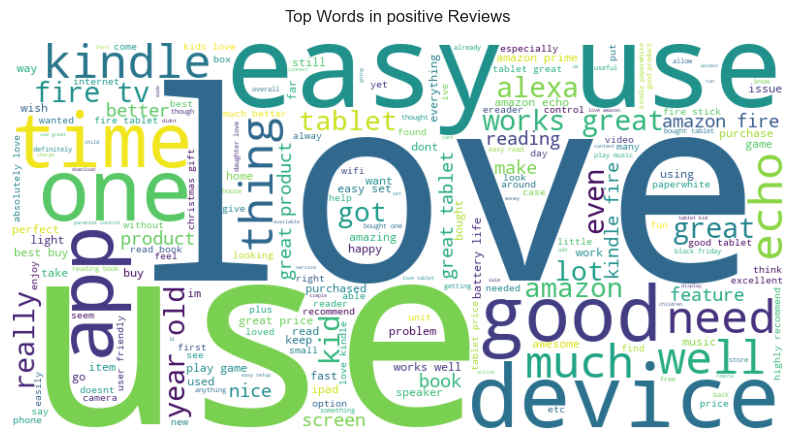

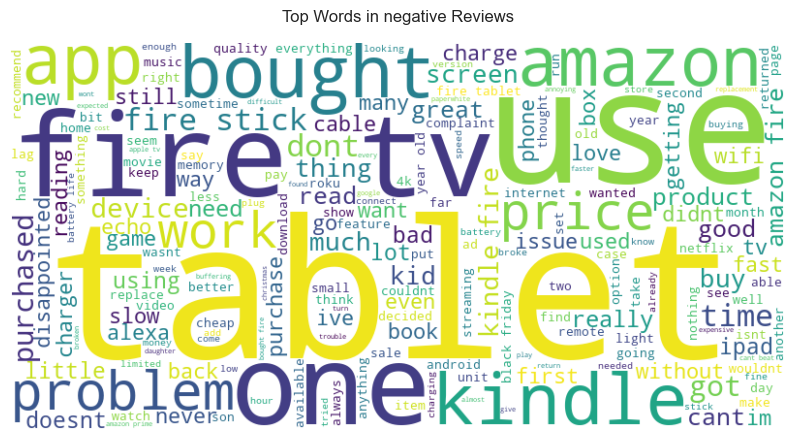

In [ ]:
for label in ['positive','negative']:
    texts = df.loc[df['sentiment_label'] == label, 'cleaned_reviews'].dropna().astype(str)
    text = " ".join(texts)
    if not text.strip():
        # skip generating a word cloud for empty text
        continue
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Top Words in {label} Reviews")
    plt.savefig(f"outputs/top_words_{label}.png", dpi=300, bbox_inches="tight")
    plt.show()

In [ ]:
# Summary statistics by category and brand

category_summary = df.groupby('categories')['sentiment_scores'].mean().sort_values(ascending=False).head(10)
print(category_summary)

brand_summary = df.groupby('brand')['sentiment_scores'].mean().sort_values(ascending=False).head(16)
print(brand_summary)

categories
Electronics,Categories,Fire TV,Kindle Store                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         0.983767
Electronics,Categories,Streaming Media Players,Amazon Devices                                                                                                                                                                                                                                                                                                                                                                                   

In [ ]:
print("Sentiment Analysis Summary:")
print("Total reviews analyzed:", len(df))
print("Positive reviews:", (df['sentiment_label']=='positive').sum())
print("Negative reviews:", (df['sentiment_label']=='negative').sum())
print("Neutral reviews:", (df['sentiment_label']=='neutral').sum())
print("Average sentiment score:", df['sentiment_scores'].mean().round(3))

Sentiment Analysis Summary:
Total reviews analyzed: 34660
Positive reviews: 31419
Negative reviews: 1691
Neutral reviews: 1550
Average sentiment score: 0.634


In [ ]:
print("Top 5 Positive Reviews:")
top_positive = df.sort_values(by='sentiment_scores', ascending=False).head(5)
for index, row in top_positive.iterrows():
    print(f"Rating: {row['reviews.rating']}, Score: {row['sentiment_scores']:.3f}")
    print(f"Title: {row['reviews.title']}")
    print(f"Review: {row['reviews.text']}\n")
print("Top 5 Negative Reviews:")
top_negative = df.sort_values(by='sentiment_scores').head(5)
for index, row in top_negative.iterrows():
    print(f"Rating: {row['reviews.rating']}, Score: {row['sentiment_scores']:.3f}")
    print(f"Title: {row['reviews.title']}")
    print(f"Review: {row['reviews.text']}\n")

Top 5 Positive Reviews:
Rating: 5.0, Score: 1.000
Title: Superb reading device - but which one's best for you
Review: This is a review of the Kindle Paperwhite launched July 2015. Essentially. the same as the previous Kindle Paperwhite but with a fantastic upgraded (300 dpi) screen, more memory and storage it's a terrific reading device. This review aims to describe both this product, and compare it with the other Kindle devices available to help you choose the best one for you.Before I start, Ive noticed several complains about Kindle not supporting the ePub format used by Canadian public libraries. Dont be put off, theres a solution in the Frequently Asked Questions section below.This review is broken up into sections so you can skip the less interesting bits. If youre in a hurry Ive included a summary at the start, and a Frequently Asked Questions section at the end.Summary - What can you do with it-----------------------------------------* Read a book. It can store 1,000s of books 

Correlation between sentiment and review ratings
Correlation coefficient: 0.237


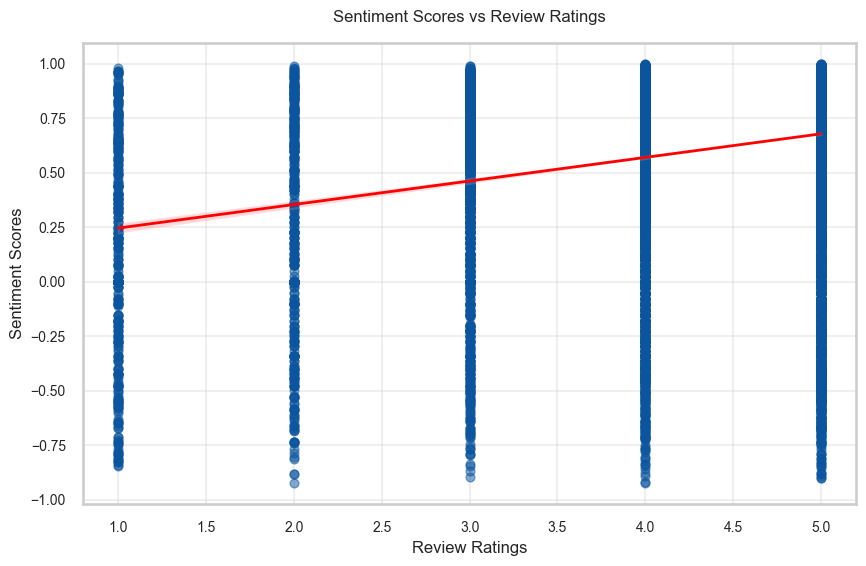

In [ ]:
# print("Correlation between sentiment and review ratings")
# x = df['reviews.rating']
# y = df['sentiment_scores']
# corr = x.corr(y)
# print(f"Correlation coefficient: {corr:.3f}")
# plt.title('Sentiment Scores vs Review Ratings')
# plt.scatter(x,y,alpha=0.5)
# plt.plot(np.unique(x), 
#          np.poly1d(np.polyfit(x, y, 1))
#          (np.unique(x)), color='red')
# plt.xlabel('Review Ratings')
# plt.ylabel('Sentiment Scores')

print("Correlation between sentiment and review ratings")
# pairwise drop NaNs for a fair correlation
corr = df['reviews.rating'].corr(df['sentiment_scores'])
print(f"Correlation coefficient: {corr:.3f}")

plt.figure(figsize=(9,6))
sns.regplot(
    data=df,
    x='reviews.rating', y='sentiment_scores',
    scatter_kws={'alpha':0.5, 's':40},
    line_kws={'color':'red', 'lw':2}
)
plt.title('Sentiment Scores vs Review Ratings')
plt.xlabel('Review Ratings')
plt.ylabel('Sentiment Scores')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("outputs/sentiment_by_rating.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
#correlation by category
#one might find, for example, that:

# Electronics have lower correlation (delivery/technical complaints).

# Books or Beauty categories have higher correlation (emotional reviews match ratings better).

# That makes the insight even richer
df = df.dropna(subset=['categories', 'reviews.rating', 'sentiment_scores'])
# Calculate correlation between sentiment scores and review ratings for each category
category_corr = (
    df.groupby('categories')[['reviews.rating', 'sentiment_scores']]
    .corr().unstack().iloc[:, 1]
    .sort_values(ascending=False)
    .rename('correlation_sentiment_rating')
)
category_corr.head(10)

categories
Frys,Software & Books,eReaders & Accessories,Tablet Cases Covers,Tablet Accessories,Computer Accessories                                                                                                                                                                                                                                                                                                                                                                         1.000000
Computers & Tablets,Tablets,All Tablets,Computers/Tablets & Networking,Tablets & eBook Readers,Fire Tablets,Frys                                                                                                                                                                                                                                                                                                                                                                 0.784023
mazon.co.uk,Amazon Devices               

In [ ]:
def plot_clean_bar(series, title, color_palette="Blues_r", truncate=40):
    # ensure output directory exists
    os.makedirs("outputs", exist_ok=True)

    plt.figure(figsize=(10,6))
    sns.barplot(
        x=series.values,
        y=[cat[:truncate] + ('...' if len(cat) > truncate else '') for cat in series.index],
        palette=color_palette
    )
    plt.title(title, fontsize=13, weight='bold', pad=15)
    plt.xlabel("Value")
    plt.ylabel("")
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()

    # sanitize title to create a safe filename
    safe_title = "".join(c for c in title if c.isalnum() or c in (" ", "_", "-")).rstrip()
    safe_filename = safe_title.replace(" ", "_")
    plt.savefig(f"outputs/{safe_filename}.png", dpi=300, bbox_inches="tight")
    plt.show()

In [ ]:
#Average sentiment and rating by category
category_summary = (
    df.groupby('categories')
    .agg(avg_sentiment=('sentiment_scores', 'mean'),
         avg_rating=('reviews.rating', 'mean'),
         count=('sentiment_scores', 'size'))
    .sort_values('avg_sentiment', ascending=False)
)
print(category_summary
)

category_summary.head(10)

                                                    avg_sentiment  avg_rating  \
categories                                                                      
Electronics,Categories,Streaming Media Players,...       0.986000    5.000000   
Electronics,Categories,Fire TV,Kindle Store              0.983767    5.000000   
Electronics,eBook Readers & Accessories,Covers,...       0.958140    4.000000   
Amazon Device Accessories,Kindle Store,Kindle T...       0.859067    3.666667   
TVs Entertainment,Wireless Speakers,Virtual Ass...       0.823614    4.285714   
Electronics,Computers,Computer Accessories,Case...       0.819067    4.833333   
eBook Readers,Kindle E-readers,Computers & Tabl...       0.794049    4.611940   
Kindle E-readers,Electronics Features,Computers...       0.790533    4.666667   
Computers & Tablets,Tablets,All Tablets,Compute...       0.753360    4.700000   
Walmart for Business,Office Electronics,Tablets...       0.723028    4.729310   
mazon.co.uk,Amazon Devices  

,avg_sentiment,avg_rating,count
categories,,,
"Electronics,Categories,Streaming Media Players,Amazon Devices",0.986000,5.000000,1
"Electronics,Categories,Fire TV,Kindle Store",0.983767,5.000000,3
"Electronics,eBook Readers & Accessories,Covers,Kindle Store,Amazon Device Accessories,Kindle E-Reader Accessories,Kindle (5th Generation) Accessories,Kindle (5th Generation) Covers",0.958140,4.000000,5
"Amazon Device Accessories,Kindle Store,Kindle Touch (4th Generation) Accessories,Kindle E-Reader Accessories,Covers,Kindle Touch (4th Generation) Covers",0.859067,3.666667,6
"TVs Entertainment,Wireless Speakers,Virtual Assistant Speakers,Featured Brands,Electronics,Amazon Devices,Home,Home Improvement,Home Safety & Security,Home Security,Alarms & Sensors,Smart Home & Home Automation Devices,Smart Hubs & Wireless Routers,Smart Hubs,Consumer Electronics,Voice-Enabled Smart Assistants,Smart Home & Connected Living,Home, Garage & Office,Smart Home,Voice Assistants,Surveillance,Home Automation,Speakers,Electronics Features,Holiday Shop,TV, Video & Home Audio,Internet & Media Streamers,Amazon Echo,Hubs & Controllers",0.823614,4.285714,7
"Electronics,Computers,Computer Accessories,Cases & Bags,Fire Tablets,Electronics Features,Tablets,Computers & Tablets,Kids' Tablets,Electronics, Tech Toys, Movies, Music,iPad & Tablets,Top Rated",0.819067,4.833333,6
"eBook Readers,Kindle E-readers,Computers & Tablets,E-Readers & Accessories,E-Readers",0.794049,4.611940,67
"Kindle E-readers,Electronics Features,Computers & Tablets,E-Readers & Accessories,E-Readers,eBook Readers",0.790533,4.666667,6
"Computers & Tablets,Tablets,All Tablets,Computers/Tablets & Networking,Tablets & eBook Readers,Fire Tablets,Frys",0.753360,4.700000,10


<ipython-input-13-97ac264f8654>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


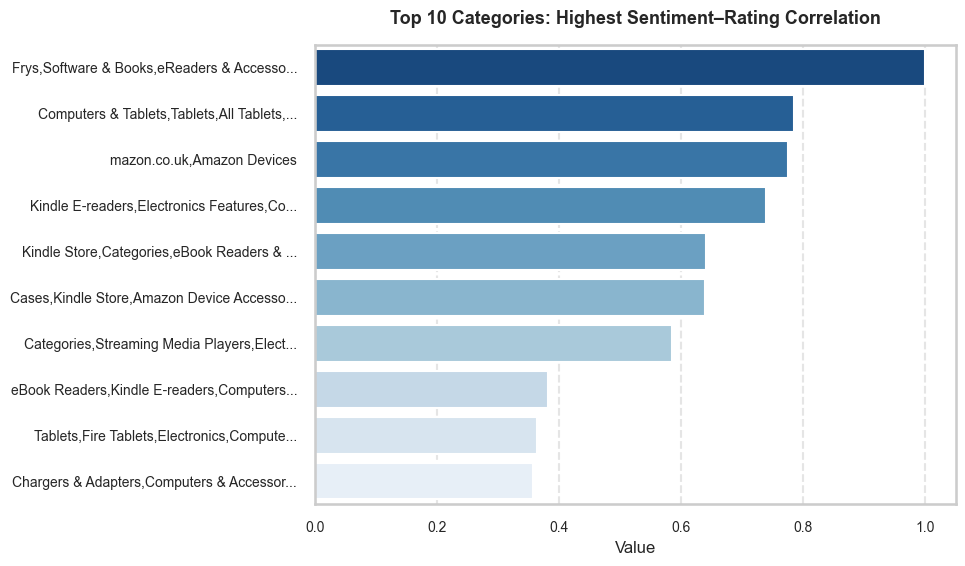

<ipython-input-13-97ac264f8654>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


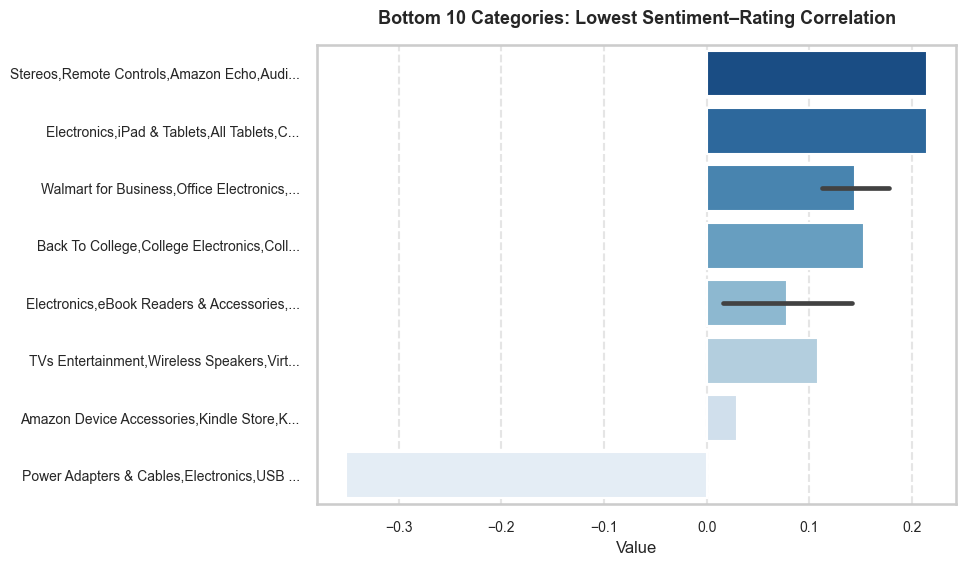

In [ ]:
# Visualize top and bottom correlations
top_corr = category_corr.dropna().head(10)
low_corr = category_corr.dropna().tail(10)

#Tells where ratings don't reflect emotion - a user might rate a product highly but express frustration in the review text, or vice versa.
#Great discussion point for customer experience teams to identify such gaps.
#
plot_clean_bar(top_corr, "Top 10 Categories: Highest Sentiment–Rating Correlation") #What people say align with ratings
# what people say does not align with ratings
plot_clean_bar(low_corr, "Bottom 10 Categories: Lowest Sentiment–Rating Correlation")

In [ ]:
brand_corr = (
    df.groupby('brand')[['reviews.rating', 'sentiment_scores']]
    .corr().unstack().iloc[:, 1]
    .sort_values(ascending=False)
    .rename("corr_sentiment_rating")
)

brand_corr.head(10)

brand
Amazon Echo                     0.323911
Amazon                          0.258893
Amazon Fire                     0.249282
Amazon Digital Services Inc.    0.222732
Amazon Fire Tv                  0.153156
Name: corr_sentiment_rating, dtype: float64

In [ ]:
brand_summary = (
    df.groupby('brand')
    .agg(avg_sentiment=('sentiment_scores', 'mean'),
         avg_rating=('reviews.rating', 'mean'),
         count=('sentiment_scores', 'size'))
    .sort_values('avg_sentiment', ascending=False)
)
brand_summary.head(10)

,avg_sentiment,avg_rating,count
brand,,,
Amazon Echo,0.695127,4.531447,636
Amazon,0.643797,4.564721,28669
Amazon Fire,0.619715,4.558594,256
Amazon Fire Tv,0.570111,4.707278,5056
Amazon Digital Services Inc.,0.494730,3.500000,10


<ipython-input-13-97ac264f8654>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


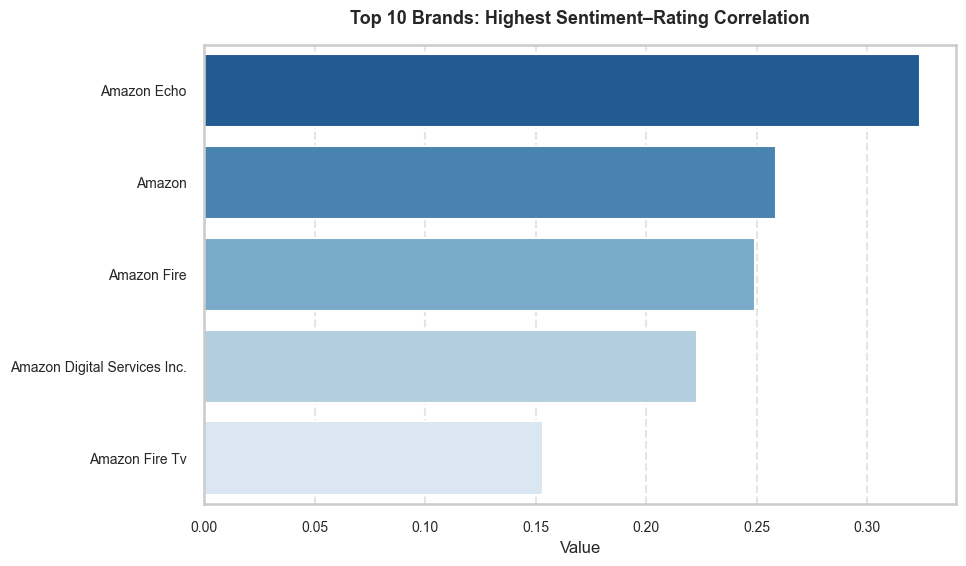

Sample size: 34627 pairs used for correlation


In [ ]:
top_brands = brand_corr.dropna().head(10)
plot_clean_bar(top_brands, "Top 10 Brands: Highest Sentiment–Rating Correlation")
print(f"Sample size: {df[['reviews.rating','sentiment_scores']].dropna().shape[0]} pairs used for correlation")

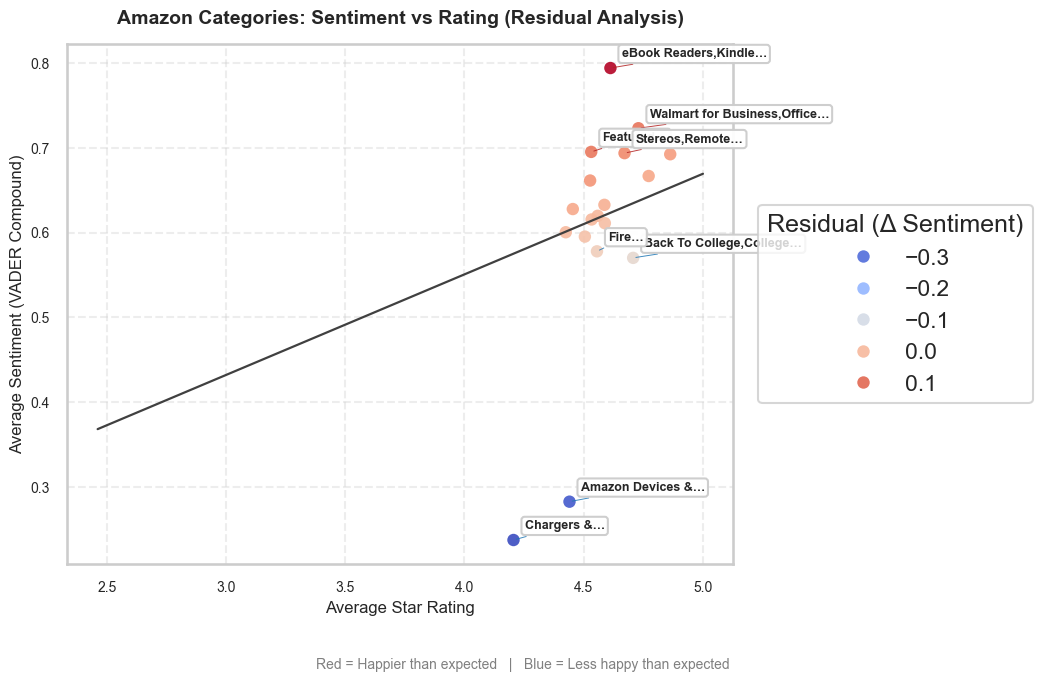

In [ ]:
# 1) Prepare data safely
category_scatter = category_summary.reset_index()[["categories","avg_rating","avg_sentiment","count"]].dropna()

x = category_scatter["avg_rating"].values
y = category_scatter["avg_sentiment"].values

# robust linear fit
if len(category_scatter) >= 2:
    m, b = np.polyfit(x, y, 1)
else:
    m, b = 0.0, float(np.mean(y)) if len(y) else 0.0

category_scatter["predicted_sentiment"] = m * category_scatter["avg_rating"] + b
category_scatter["residual"] = category_scatter["avg_sentiment"] - category_scatter["predicted_sentiment"]

# filter tiny categories to reduce clutter
dfp = category_scatter[category_scatter["count"] > 30].copy()

# label top K positive/negative residuals
K = 4
top_pos = dfp.nlargest(K, "residual").copy()
top_neg = dfp.nsmallest(K, "residual").copy()

# 2) Plot
plt.figure(figsize=(10.8, 6.6))

sc = sns.scatterplot(data=dfp, x="avg_rating", y="avg_sentiment",
                     hue="residual", palette="coolwarm", s=80, alpha=0.9, edgecolor="none")

# regression line (expected sentiment baseline)
x_min, x_max = x.min(), x.max()
plt.plot([x_min, x_max], [m*x_min + b, m*x_max + b], color="0.25", lw=1.6)

# titles / labels
plt.title("Amazon Categories: Sentiment vs Rating (Residual Analysis)", fontsize=14, weight="bold")
plt.xlabel("Average Star Rating")
plt.ylabel("Average Sentiment (VADER Compound)")
plt.grid(True, linestyle="--", alpha=0.35)

# legend outside
plt.legend(title="Residual (Δ Sentiment)", bbox_to_anchor=(1.02, 0.5), loc="center left", frameon=True)

# small caption explaining colors
plt.figtext(0.5, -0.04,
            "Red = Happier than expected   |   Blue = Less happy than expected",
            ha="center", fontsize=10, color="gray")

# 3) Annotate extremes
def _annotate_block(df_block, color):
    for _, r in df_block.iterrows():
        label = shorten(str(r["categories"]), width=28, placeholder="…")
        plt.annotate(label,
                     (r["avg_rating"], r["avg_sentiment"]),
                     xytext=(8, 8), textcoords="offset points",
                     fontsize=9, weight="bold",
                     bbox=dict(boxstyle="round,pad=0.25", fc="white", ec="0.8", alpha=0.95),
                     arrowprops=dict(arrowstyle="-", lw=0.7, color=color, alpha=0.85))

_annotate_block(top_pos, color="#b22222")  # positive residuals (overperformers)
_annotate_block(top_neg, color="#1f77b4")  # negative residuals (underperformers)

plt.tight_layout()
plt.savefig("outputs/residual_scatter_clean.png", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()

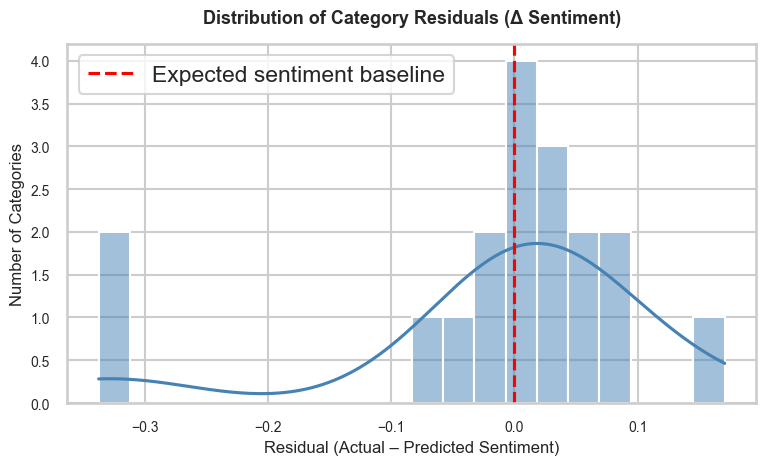

Residual Summary:
count    18.000000
mean     -0.012997
std       0.126494
min      -0.337755
25%      -0.013893
50%       0.007583
75%       0.045961
max       0.170776
Name: residual, dtype: float64

Count of categories:
Negative residuals: 7
Positive residuals: 11


In [ ]:
# --- Residual distribution plot ---
plt.figure(figsize=(8,5))
sns.histplot(dfp["residual"], bins=20, kde=True, color="steelblue")
plt.title("Distribution of Category Residuals (Δ Sentiment)", fontsize=13, weight="bold")
plt.xlabel("Residual (Actual – Predicted Sentiment)")
plt.ylabel("Number of Categories")
plt.axvline(0, color="red", linestyle="--", label="Expected sentiment baseline")
plt.legend()
plt.tight_layout()
plt.savefig("outputs/residual_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

# quick summary statistics
print("Residual Summary:")
print(dfp['residual'].describe())
print("\nCount of categories:")
print("Negative residuals:", (dfp['residual'] < 0).sum())
print("Positive residuals:", (dfp['residual'] > 0).sum())

In [ ]:
#a small table summarizing the top overperforming and underperforming categories
summary_tbl = (
    pd.concat([top_pos.assign(flag="Overperforming (+)"),
               top_neg.assign(flag="Underperforming (−)")])
    [["flag","categories","avg_rating","avg_sentiment","predicted_sentiment","residual"]]
    .round(3)
    .sort_values(["flag","residual"], ascending=[False, False])
)
summary_tbl
summary_tbl.to_csv("outputs/category_performance_summary.csv", index=False)

In [ ]:
if __name__ == "__main__":
    print("Run all cells in order to reproduce figures in outputs/")

Run all cells in order to reproduce figures in outputs/


In [ ]:
df.head()

,reviews.rating,reviews.text,reviews.title,categories,brand,cleaned_reviews,sentiment_scores,sentiment_label
0,5.0,This product so far has not disappointed. My c...,Kindle,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,product far disappointed children love use lik...,0.8126,positive
1,5.0,great for beginner or experienced person. Boug...,very fast,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,great beginner experienced person bought gift ...,0.8934,positive
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,inexpensive tablet use learn step nabi thrille...,0.4404,positive
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,ive fire hd 8 two weeks love tablet great valu...,0.9880,positive
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,bought grand daughter comes visit set user ent...,0.9313,positive


<ipython-input-24-4803c226fb5f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='reviews.rating', y='residual',  palette=sns.color_palette("coolwarm", 5))


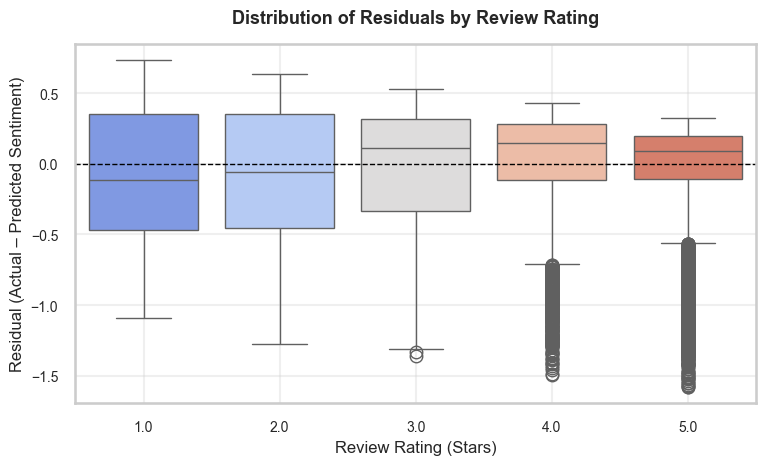

                  count   mean    std    min    25%    50%    75%    max
reviews.rating                                                          
1.0               410.0 -0.099  0.500 -1.090 -0.468 -0.113  0.353  0.733
2.0               402.0 -0.106  0.505 -1.276 -0.457 -0.058  0.355  0.637
3.0              1499.0 -0.025  0.423 -1.358 -0.334  0.108  0.316  0.527
4.0              8541.0  0.043  0.335 -1.493 -0.114  0.148  0.281  0.427
5.0             23775.0 -0.010  0.306 -1.577 -0.107  0.093  0.198  0.321


In [ ]:
x = df["reviews.rating"]
y = df["sentiment_scores"]
m1, b1 = np.polyfit(x, y, 1)
df["predicted_sentiment"] = m1 * x + b1
df["residual"] = y - df["predicted_sentiment"]

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='reviews.rating', y='residual',  palette=sns.color_palette("coolwarm", 5))
plt.title("Distribution of Residuals by Review Rating", fontsize=13, weight='bold')
plt.xlabel("Review Rating (Stars)")
plt.ylabel("Residual (Actual – Predicted Sentiment)")
plt.axhline(0, color='black', linestyle='--', lw=1)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("outputs/residuals_by_rating.png", dpi=300, bbox_inches="tight")
plt.show()

#quick summary
print(df.groupby('reviews.rating')['residual'].describe().round(3))